**Import Dataset**

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('Vacant site by URA - additional details.csv')
data

,date_of_launch,date_of_tender_closing,date_of_award,location,type_of_devt_allowed,lease,type_of_devt_code,site_area,gross_plot_ratio,gross_floor_area,no_of_bids,successful_tenderer_name,successful_tender_price,psm_per_gpr_or_gfa,planning_area,type_of_region
0,28/4/2016,28/6/2016,1/7/2016,Martin Place,Residential,99,Residential (Non-Landed),"15,936.10",na,44622.0,13,First Bedok Land Pte Ltd,"595,100,000","13,336.47",River Valley,Core Central Region (CCR)
1,30/3/2016,24/5/2016,30/5/2016,Bukit Batok West Avenue 6,Commercial and Residential,99,Commercial and Residential,"14,696.70",na,44091.0,11,Qingjian Realty (BBR) Pte Ltd. and Qingjian Re...,"301,160,000","6,830.42",Bukit Batok,Outside Core Central Region (OCR)
2,25/2/2016,7/4/2016,13/4/2016,Jalan Kandis,Residential,99,Residential (Non-Landed),"7,045.60",na,9864.0,9,Dillenia Land Pte.Ltd.,"51,070,228","5,177.44",Sembawang,Outside Core Central Region (OCR)
3,20/1/2016,23/2/2016,26/2/2016,New Upper Changi Road / Bedok South Avenue 3,Residential,99,Residential (Non-Landed),"24,394.00",na,51228.0,8,CEL Residential Development Pte. Ltd.,"419,380,000","8,186.54",Bedok,Outside Core Central Region (OCR)
4,26/11/2015,14/1/2016,18/1/2016,Siglap Road,Residential,99,Residential (Non-Landed),"19,309.60",na,67584.0,8,"FCL Topaz Pte. Ltd., Sekisui House, Ltd. and K...","624,180,000","9,235.62",Bedok,Outside Core Central Region (OCR)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,19/10/1992,9/2/1993,21/5/1993,Kaki Bukit,Light industry,60,Industrial,"60,000.00",2,120000.0,2,Technology Parks Pte Ltd,"44,880,000",374,Bedok,Outside Core Central Region (OCR)
336,19/10/1992,9/2/1993,21/5/1993,Tuas South Avenue 3 / Tuas South Avenue 4,General or Light industry,60,Industrial,"102,264.00",1,102264.0,1,Technology Parks Pte Ltd,"24,338,800",238,Tuas,Outside Core Central Region (OCR)
337,19/10/1992,9/2/1993,21/5/1993,Tuas South Avenue 4 / Tuas South Avenue 5,General or Light industry,60,Industrial,"102,264.00",1,102264.0,1,Technology Parks Pte Ltd,"24,032,000",235,Tuas,Outside Core Central Region (OCR)
338,31/8/1992,24/11/1992,15/2/1993,Merchant Road / Angus Street,Restoration and adaptive reuse of existing bui...,99,Hotel,"2,609.00",na,6167.0,2,Food Alley Pte Ltd,"6,890,000","1,117.24",Singapore River,Core Central Region (CCR)


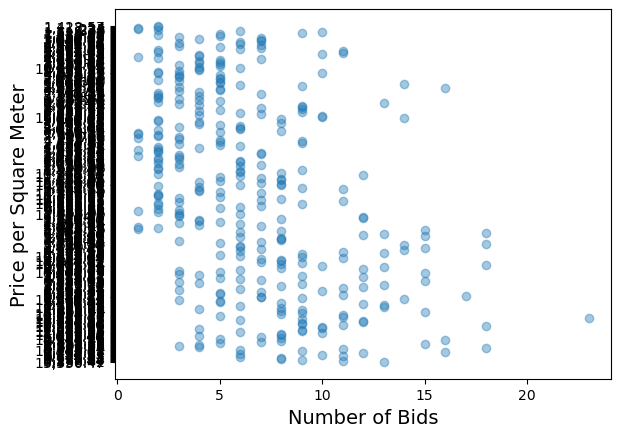

In [19]:
plt.scatter(data['no_of_bids'], data['psm_per_gpr_or_gfa'], alpha=0.4)

plt.xlabel('Number of Bids', fontsize=14)
plt.ylabel('Price per Square Meter', fontsize=14)
plt.show()

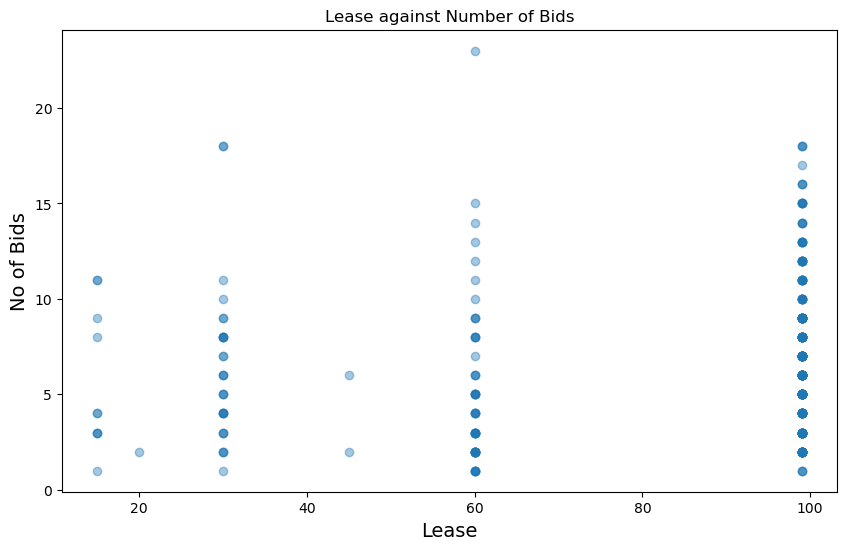

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(data['lease'], data['no_of_bids'], alpha=0.4)

plt.title('Lease against Number of Bids')
plt.xlabel('Lease', fontsize=14)
plt.ylabel('No of Bids', fontsize=14)
plt.show()

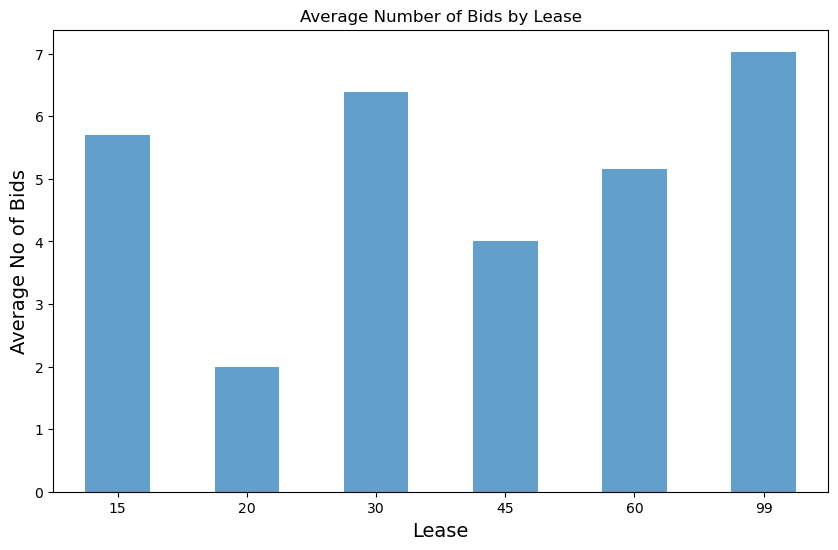

In [21]:
# Group by 'lease' and calculate the average number of bids
average_bids = data.groupby('lease')['no_of_bids'].mean()

plt.figure(figsize=(10, 6))
average_bids.plot(kind='bar', alpha=0.7)

plt.title('Average Number of Bids by Lease')
plt.xlabel('Lease', fontsize=14)
plt.ylabel('Average No of Bids', fontsize=14)
plt.xticks(rotation=0)  # You can adjust the rotation value for x-axis labels

plt.show()

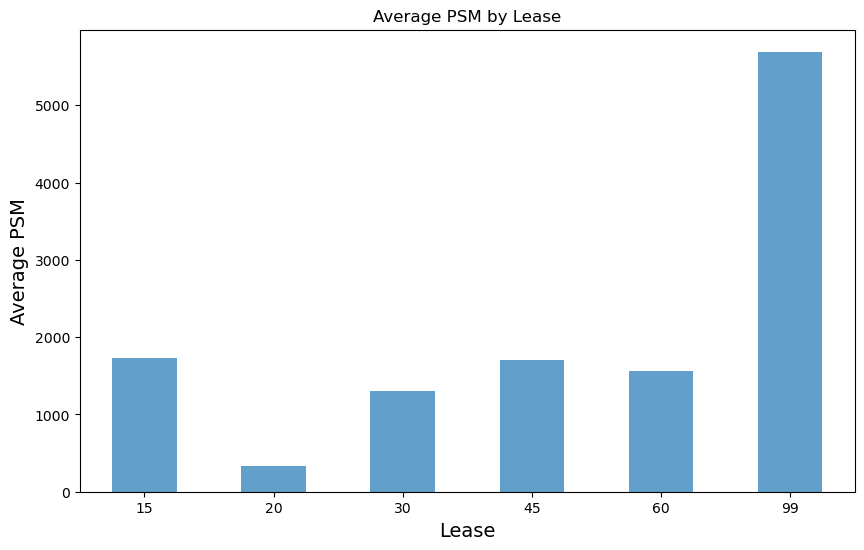

In [24]:
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data = pd.read_csv('Vacant site by URA - additional details.csv')

def clean_and_convert_price(price):
    if isinstance(price, str):
        # Using regular expression to remove commas and other non-numeric characters
        price = re.sub(r'[^\d.]', '', price)
    try:
        return float(price)
    except ValueError:
        return None

data["psm_per_gpr_or_gfa"] = data["psm_per_gpr_or_gfa"].apply(clean_and_convert_price)
    
# Convert 'psm_per_gpr_or_gfa' to float
data['psm_per_gpr_or_gfa'] = data['psm_per_gpr_or_gfa'].astype(float)

average_psm = data.groupby('lease')['psm_per_gpr_or_gfa'].mean()

plt.figure(figsize=(10, 6))
average_psm.plot(kind='bar', alpha=0.7)

plt.title('Average PSM by Lease')
plt.xlabel('Lease', fontsize=14)
plt.ylabel('Average PSM', fontsize=14)
plt.xticks(rotation='horizontal')

plt.show()